# Medida de los coeficientes de scattering y de absorción de un phantom


## 1. Desarrollo de un phantom

Para realizar estudios en el laboratorio es muy útil fabricar estructuras que simulen las propiedades de los tejidos biológicos (phantoms).  Una manera sencilla de proceder se  puede consultar en el artículo adjunto  [Low-cost fabrication of optical tissue phantoms for use in biomedical imaging](Phantom.pdf) .

 En el caso de simular tejido cerebral, se usa como base  agar, al que se le añaden diferentes cantidades de partículas micrométricas de Al2 O3que permiten variar el coeficiente de scattering y tinta india que simula las propiedades de absorción de la sangre muy bien en el rango del visible.  Para simular el tejido cerebral se emplea 2 gramos de agar, al que se añade 0.3 gramos de partículas de Al$_2$O$_3$ y 0.3 ml de tinta, disuelto todo ello en 100 ml de agua. 
 
 Se quiere determinar el coeficiente de scattering y el coeficiente de absorción de estos phantoms para la longitud de onda de un laser de He-Ne de $\lambda= 532$ nm.  Para ello, se comienza fabricando unas muestras que sólo poseen scattering mezclando 2 gramos de agar, al que se añade 0.3 gramos de micropartículas de Al$_2$O$_3$ como medio de scattering (no hay absorción).  Todo ello se diluye en 100 ml de agua desionizada. La mezcla se lleva a 900$^o$C, agitando continuamente y se deja enfriar a 20$^o$C. Posteriormente se mantiene a 50$C durante 24 horas para que solidifique. 

## 2. Esquema experimental para la medida de la transmitancia

Para determinar el coeficiente de extinción de cada muestra de tejido simulado de cerebro se lleva a cabo el montaje de la figura. Se preparan muestras de diferentes espesores y se iluminan con el láser de He-Ne ($\lambda= 532$ nm).  El láser se divide en dos haces, uno de referencia, que mide la intensidad incidente, $I_0$, y otro que se dirige sobre la muestra. A la salida se sitúa un detector que mide la intensidad transmitida $I$ para cada espesor de la muestra.

![fig1](figprob2_2b_1.png)

La obtención de los coeficientes se basa en la aplicación de la ley de Beer:

![fig2](figprob2_2b_2.png)


$$I=I_0 e^{-\mu_t x}$$

donde $\mu_t = \mu_s + \mu_a$.  Tomando  el logaritmo neperiano de la expresión de la ley de Beer se puede observar que,

$$-ln \frac{I}{I_0}= \mu_t x$$

Existe una relación lineal entre $A=-ln(I/I_0)$  y $\mu_t$. Para el caso del primer tipo de phantom se ha considerado que solo posee partículas que no absorben, por lo que $\mu_t=\mu_s$. Las medidas obtenidas para las muestras que solo presentan scattering se indican en la tabla adjunta.

| Espesor d$_j$ (mm) | Potencia incidente (mW) | Potencia transmitida (mW) |
----------------------|-----------------------|----------------------------
2.32 | 55.47 | 45.67
4.10 | 54.37 | 39.86
6.64 | 53.97 | 32.33
8.26 | 53.37 | 26.18
10.12 | 55.37 |24.2
12.75 | 53.97 | 19.1


Bastará con realizar un ajuste lineal  entre las magnitudes $A$ y $x$ y determinar la pendiente de la recta de ajuste que nos dará directamente el coeficiente $\mu_s$. 

Posteriormente se fabrican unas segundas muestras de la misma manera añadiendo ahora, además de las partículas de scattering, 0.3 ml de tinta que simula la absorción de la hemoglobina y se vuelve a medir la transmitancia.  Los resultados se muestran en la tabla siguiente (ahora hay absorción y scattering simultáneamente:

| Espesor d$_j$ (mm) | Potencia incidente (mW) | Potencia transmitida (mW) | -ln(P/P$_0$) |
----------------------|--------------------|------------------------|----
2.66 | 55.47 | 31.67 | 0.560
4.71 | 54.37 | 26.57 | 0.716
6.80 | 53.97 | 20.97 | 0.945
8.56 | 55.37 | 12.77 | 1.467
12.84 | 53.97 | 8.17 | 1.888

En este caso, como el medio  tiene absorción y scattering, de la pendiente del ajuste lineal de los datos se obtendrá el coeficiente $\mu_t$ de la muestra. El coeficiente de absorción se obtendrá como:

$$\mu_a = \mu_t - \mu_s$$



## 3. Script para el ajuste lineal


coef. de abs. =   0.47  cm^(-1)


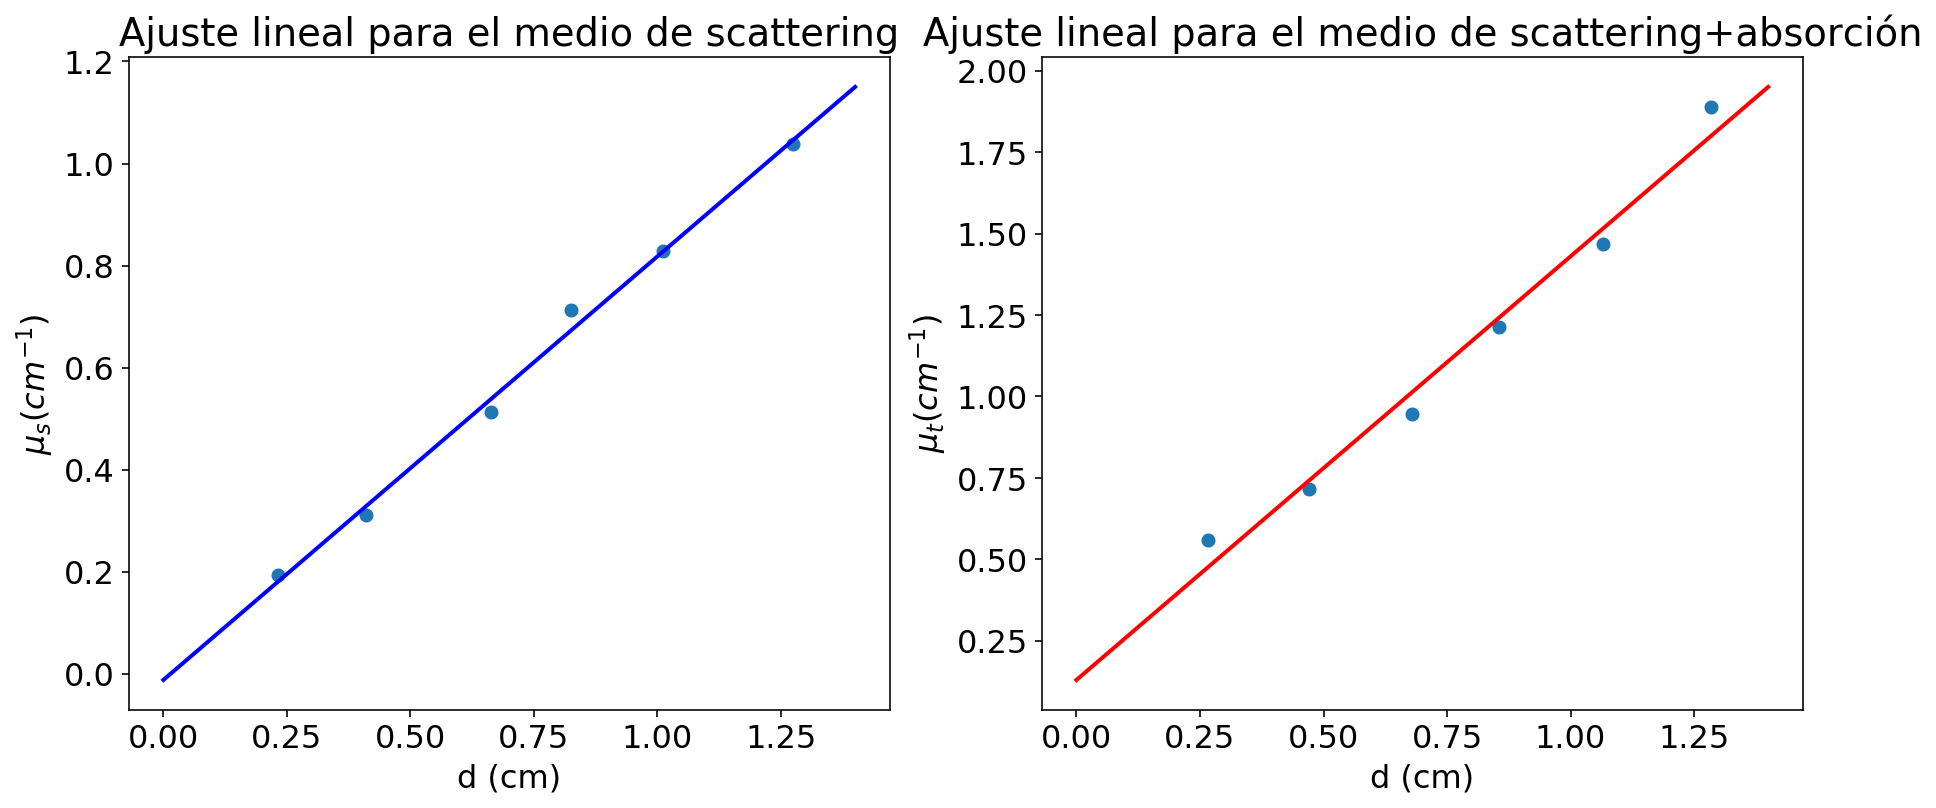

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',size=16)
from scipy.stats import linregress
#---Definimos los vectores de los espesores,e intensidades para el medio de
#scattering
dscat=np.array([2.32, 4.10, 6.64, 8.26, 10.12, 12.75])*0.1 # Espesores del phantom con solo scattering
I0=np.array([55.47, 54.37, 53.97, 53.37, 55.37, 53.97]) #Intensidad incidente
Iscat= np.array([45.67, 39.86, 32.33, 26.18, 24.2, 19.1])
Ascat=-np.log(Iscat/I0)
pscat=linregress(dscat,Ascat)
mu_s=pscat[0] # coeficiente de escattering: pendiente  del ajuste de phantom total
#-----Dibujamos la recta del ajuste 
u=np.linspace(0,1.4, 50)
fig, ax = plt.subplots(1,2,figsize=(15,6))
yscat=pscat[0]*u+pscat[1]
ax[0].plot(dscat,Ascat,'o')
ax[0].plot(u,yscat,'b', linewidth=2)
ax[0].set_xlabel('d (cm)')
ax[0].set_ylabel('$\mu_s (cm^{-1})$')
ax[0].set_title('Ajuste lineal para el medio de scattering')


#---Definimos los vectores de los espesores,e intensidades para el medio de
# scattering + absorcion
dtotal=np.array([2.66,4.71, 6.80, 8.56, 10.66, 12.84])*0.1 # Espesores del phantom total
ITotal=np.array([31.67, 26.57, 20.97, 15.87, 12.77, 8.17]) # Intensidad medio con absorcion y scattering 
 
Atotal=-np.log(ITotal/I0)
ptotal=linregress(dtotal,Atotal)
mu_t=ptotal[0] # coeficiente de extinción: pendiente  del ajuste de phantom total
 
#---Dibujamos la recta del ajuste ----------------------------------------------

ytotal=ptotal[0]*u+ ptotal[1]


ax[1].plot(dtotal,Atotal,'o', u,ytotal,'r',linewidth=2)
ax[1].set_xlabel('d (cm)')
ax[1].set_ylabel('$\mu_t (cm^{-1})$')
#ax[1].set_xlim(0,1.4)
#ax[1].set_ylim(0,2)
ax[1].set_title('Ajuste lineal para el medio de scattering+absorción')
 
 
# Coeficiente de absorción
mu_a=mu_t-mu_s # coeficiente de absorcion
print('coef. de abs. =  ', np.round(mu_a,3), ' cm^(-1)') 
